### This notebook is used to:
####  -impute with zeros when all the information about a row is known<br> (exemple: sum of a few 100g columns is 100, the rest must be 0)
####  -impute with medians of pnns groups
####  -impute with KNN
####  -drop heavely imputed columns (under a certain percent of original completion)
####  -impute with median



### The modified dataset is then used for PCA.<br><br>

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

import projet_functions_3 as pf

In [2]:
# use clean data
data_path = "D:\OpenClassrooms\projet_3\clean_data.csv"

df = pd.read_csv(data_path, sep=',')
print(df.shape)

(320639, 45)


In [3]:
# If test mode active, only a sample of the data is used to make calculations faster.
# The sample also won't be saved at the end.

test_mode = False

In [4]:
# for bigger plot
scale_factor = 2
default_size = [6.4, 4.8]
plt.rcParams['figure.figsize'] = [n * scale_factor for n in default_size]

### Columns completion

In [5]:
# make dict with nb values and percentage completion of each column

completion_dict = {}
for column in df.columns:
    nb_values = df[column].notna().sum()
    percent = 100 * nb_values / df.shape[0]
    completion_dict[column] = [nb_values, percent]

    
# shows percentage of completion for each column    

print('column_name : nb_values  (percentage_of_completion)', '\n\n')
for column in completion_dict:
    nb_values = completion_dict[column][0]
    percent = completion_dict[column][1]
    print(f'{column} : {nb_values}  ({int(percent)}%)')
    print()

column_name : nb_values  (percentage_of_completion) 


product_name : 302883  (94%)

generic_name : 52768  (16%)

brands : 292267  (91%)

categories : 84375  (26%)

categories_tags : 84374  (26%)

categories_fr : 84375  (26%)

countries_fr : 320359  (99%)

additives_n : 320639  (100%)

additives : 154616  (48%)

ingredients_from_palm_oil_n : 248850  (77%)

ingredients_that_may_be_from_palm_oil_n : 248850  (77%)

nutrition_grade_fr : 221147  (68%)

pnns_groups_1 : 91498  (28%)

pnns_groups_2 : 94475  (29%)

main_category : 84351  (26%)

main_category_fr : 84351  (26%)

energy_100g : 260475  (81%)

fat_100g : 243799  (76%)

saturated-fat_100g : 229483  (71%)

monounsaturated-fat_100g : 22820  (7%)

polyunsaturated-fat_100g : 22857  (7%)

trans-fat_100g : 143236  (44%)

cholesterol_100g : 144032  (44%)

carbohydrates_100g : 243481  (75%)

sugars_100g : 244876  (76%)

fiber_100g : 200814  (62%)

proteins_100g : 259819  (81%)

salt_100g : 255262  (79%)

alcohol_100g : 4128  (1%)

vitamin-a_

### Don't forget to comment the next cell for the final execution

In [6]:
# reduce size of dataframe for testing phase

nb_samples = 10000
if test_mode:
    df = df.sample(nb_samples)
print(df.shape)

(320639, 45)


#### make list of quantitative columns

In [7]:
# make list of quantitative columns

quantitative_columns = []
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        quantitative_columns.append(column)
        print(column, ':', df[column].dtypes)

additives_n : float64
ingredients_from_palm_oil_n : float64
ingredients_that_may_be_from_palm_oil_n : float64
energy_100g : float64
fat_100g : float64
saturated-fat_100g : float64
monounsaturated-fat_100g : float64
polyunsaturated-fat_100g : float64
trans-fat_100g : float64
cholesterol_100g : float64
carbohydrates_100g : float64
sugars_100g : float64
fiber_100g : float64
proteins_100g : float64
salt_100g : float64
alcohol_100g : float64
vitamin-a_100g : float64
vitamin-d_100g : float64
vitamin-c_100g : float64
vitamin-b1_100g : float64
vitamin-b2_100g : float64
vitamin-pp_100g : float64
vitamin-b6_100g : float64
vitamin-b9_100g : float64
vitamin-b12_100g : float64
potassium_100g : float64
calcium_100g : float64
phosphorus_100g : float64
iron_100g : float64
magnesium_100g : float64
zinc_100g : float64
nutrition-score-fr_100g : float64


### Imputation with column groups

#### groups of columns:
if the sum of group equals a maximum value (for exemple 100), <br>
it means if this group contains NaNs, they are equal to 0.

In [8]:
wanted_sum_value = 100
margin = 1    # margin in case of rounding aproximations

column_group = ['fat_100g',
                'carbohydrates_100g',
                'proteins_100g',
                'salt_100g',
                'fiber_100g', 
               ]


print(df[column_group].isna().sum(), '\n')
df = pf.impute_zeros(column_group, wanted_sum_value, df, margin=margin)
print(df[column_group].isna().sum())

fat_100g               76840
carbohydrates_100g     77158
proteins_100g          60820
salt_100g              65377
fiber_100g            119825
dtype: int64 

fat_100g               76799
carbohydrates_100g     77090
proteins_100g          60722
salt_100g              65189
fiber_100g            117067
dtype: int64


D:\OpenClassrooms\projet_3\python_scripts\projet_functions_3.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column].isna() & is_good] = 0


In [9]:
wanted_sum_value = df['fat_100g']
margin = 1

column_group = ['saturated-fat_100g', 
                'monounsaturated-fat_100g', 
                'polyunsaturated-fat_100g'
               ]

print(df[column_group].isna().sum(), '\n')
df = pf.impute_zeros(column_group, wanted_sum_value, df, margin=margin)
print(df[column_group].isna().sum())

saturated-fat_100g           91156
monounsaturated-fat_100g    297819
polyunsaturated-fat_100g    297782
dtype: int64 

saturated-fat_100g           64559
monounsaturated-fat_100g    210699
polyunsaturated-fat_100g    210676
dtype: int64


### Imputation with pnns-groups

In [10]:
# try to make a general 'classification' column
# to see how full it could be

classification_columns = ['categories', 
                          'categories_tags', 
                          'categories_fr', 
                          'pnns_groups_1', 
                          'pnns_groups_2', 
                          'main_category', 
                          'main_category_fr'
                         ]

print('<column name> : <nb values>  (<percentage of completion>)', '\n\n')
for column in classification_columns:
    nb_values = df[column].notna().sum()
    percent = round(100 * nb_values / df.shape[0])
    print(column, ':', nb_values,  f' ({percent}%)', '\n')

<column name> : <nb values>  (<percentage of completion>) 


categories : 84375  (26%) 

categories_tags : 84374  (26%) 

categories_fr : 84375  (26%) 

pnns_groups_1 : 91498  (29%) 

pnns_groups_2 : 94475  (29%) 

main_category : 84351  (26%) 

main_category_fr : 84351  (26%) 



In [11]:
df['classification'] = False
df['ones'] = True

for column in classification_columns:
    not_nan = df['ones'].where(df[column].notna(), other=False)
    not_nan.head()
    df['classification'] = df['classification'] | not_nan

ratio = (df['classification'] == True).sum() / df.shape[0]
print(f"df['classification'] is {round(ratio * 100)}% complete.")

df['classification'] is 29% complete.


In [12]:
# 'classification' is as complete as the 'pnns_groups' columns, so use them instead
df = df.drop(['classification', 'ones'], axis=1)

In [13]:
# the 'unknown' category is not usefull, so make sure to not use it in imputing
df[['pnns_groups_2', 'pnns_groups_1']].describe()

,pnns_groups_2,pnns_groups_1
count,94475,91498
unique,42,14
top,unknown,unknown
freq,22623,22623


In [14]:
pnns_aggregate = df.groupby(['pnns_groups_1', 'pnns_groups_2']).agg('median')

In [15]:
pnns_aggregate.head()

additives_n  \
pnns_groups_1 pnns_groups_2                                   
Beverages     Artificially sweetened beverages          5.0   
              Fruit juices                              0.0   
              Fruit nectars                             1.0   
              Non-sugared beverages                     0.0   
              Sweetened beverages                       2.0   

                                                ingredients_from_palm_oil_n  \
pnns_groups_1 pnns_groups_2                                                   
Beverages     Artificially sweetened beverages                          0.0   
              Fruit juices                                              0.0   
              Fruit nectars                                             0.0   
              Non-sugared beverages                                     0.0   
              Sweetened beverages                                       0.0   

                                                ingredients_that_may_be_from_palm_oil_n  \
pnns_groups_1 pnns_groups_2                                                               
Beverages     Artificially sweetened beverages                                      0.0   
              Fruit juices                                                          0.0   
              Fruit nectars                                                         0.0   
              Non-sugared beverages                                                 0.0   
              Sweetened beverages                                                   0.0   

                                                energy_100g  fat_100g  \
pnns_groups_1 pnns_groups_2                                             
Beverages     Artificially sweetened beverages         21.0       0.0   
              Fruit juices                            196.0       0.1   
              Fruit nectars                           200.0       0.1   
              Non-sugared beverages                   159.0       0.1   
              Sweetened beverages                     176.0       0.0   

                                                saturated-fat_100g  \
pnns_groups_1 pnns_groups_2                                          
Beverages     Artificially sweetened beverages                 0.0   
              Fruit juices                                     0.0   
              Fruit nectars                                    0.0   
              Non-sugared beverages                            0.0   
              Sweetened beverages                              0.0   

                                                monounsaturated-fat_100g  \
pnns_groups_1 pnns_groups_2                                                
Beverages     Artificially sweetened beverages                       0.0   
              Fruit juices                                           0.0   
              Fruit nectars                                          0.0   
              Non-sugared beverages                                  0.0   
              Sweetened beverages                                    0.0   

                                                polyunsaturated-fat_100g  \
pnns_groups_1 pnns_groups_2                                                
Beverages     Artificially sweetened beverages                       0.0   
              Fruit juices                                           0.0   
              Fruit nectars                                          0.0   
              Non-sugared beverages                                  0.0   
              Sweetened beverages                                    0.0   

                                                trans-fat_100g  \
pnns_groups_1 pnns_groups_2                                      
Beverages     Artificially sweetened beverages             0.0   
              Fruit juices                                 0.0   
              Fruit nectars                                0.0   
              N

In [15]:
# impute NaNs in columns_to_impute with median of pnns group

columns_to_impute = quantitative_columns

before = df[columns_to_impute].isna().sum()

for i in range(df.shape[0]):
    p1 = df['pnns_groups_1'].iloc[i]
    p2 = df['pnns_groups_2'].iloc[i]
    
    # don't impute if pnns groups are NaN or with the 'unknown' category
    if (type(p1) != str) or (type(p2) != str):
        continue
    elif (p1 == 'unknown') and (p2 == 'unknown'):
        continue

    # find if the value needs to be imputed
    for column in columns_to_impute:
        if np.isnan(df[column].iloc[i]):
            df[column].iloc[i] = pnns_aggregate.loc[p1].loc[p2][column]

            
after = df[columns_to_impute].isna().sum()
print(before - after)

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


additives_n                                    0
ingredients_from_palm_oil_n                11052
ingredients_that_may_be_from_palm_oil_n    11052
energy_100g                                13956
fat_100g                                   16198
saturated-fat_100g                         16134
monounsaturated-fat_100g                   51426
polyunsaturated-fat_100g                   51412
trans-fat_100g                             66692
cholesterol_100g                           66342
carbohydrates_100g                         16593
sugars_100g                                17037
fiber_100g                                 35410
proteins_100g                              14296
salt_100g                                  16788
alcohol_100g                               67516
vitamin-a_100g                             66011
vitamin-d_100g                             54522
vitamin-c_100g                             65417
vitamin-b1_100g                            60918
vitamin-b2_100g     

### Correlation matrix for all quantitative columns

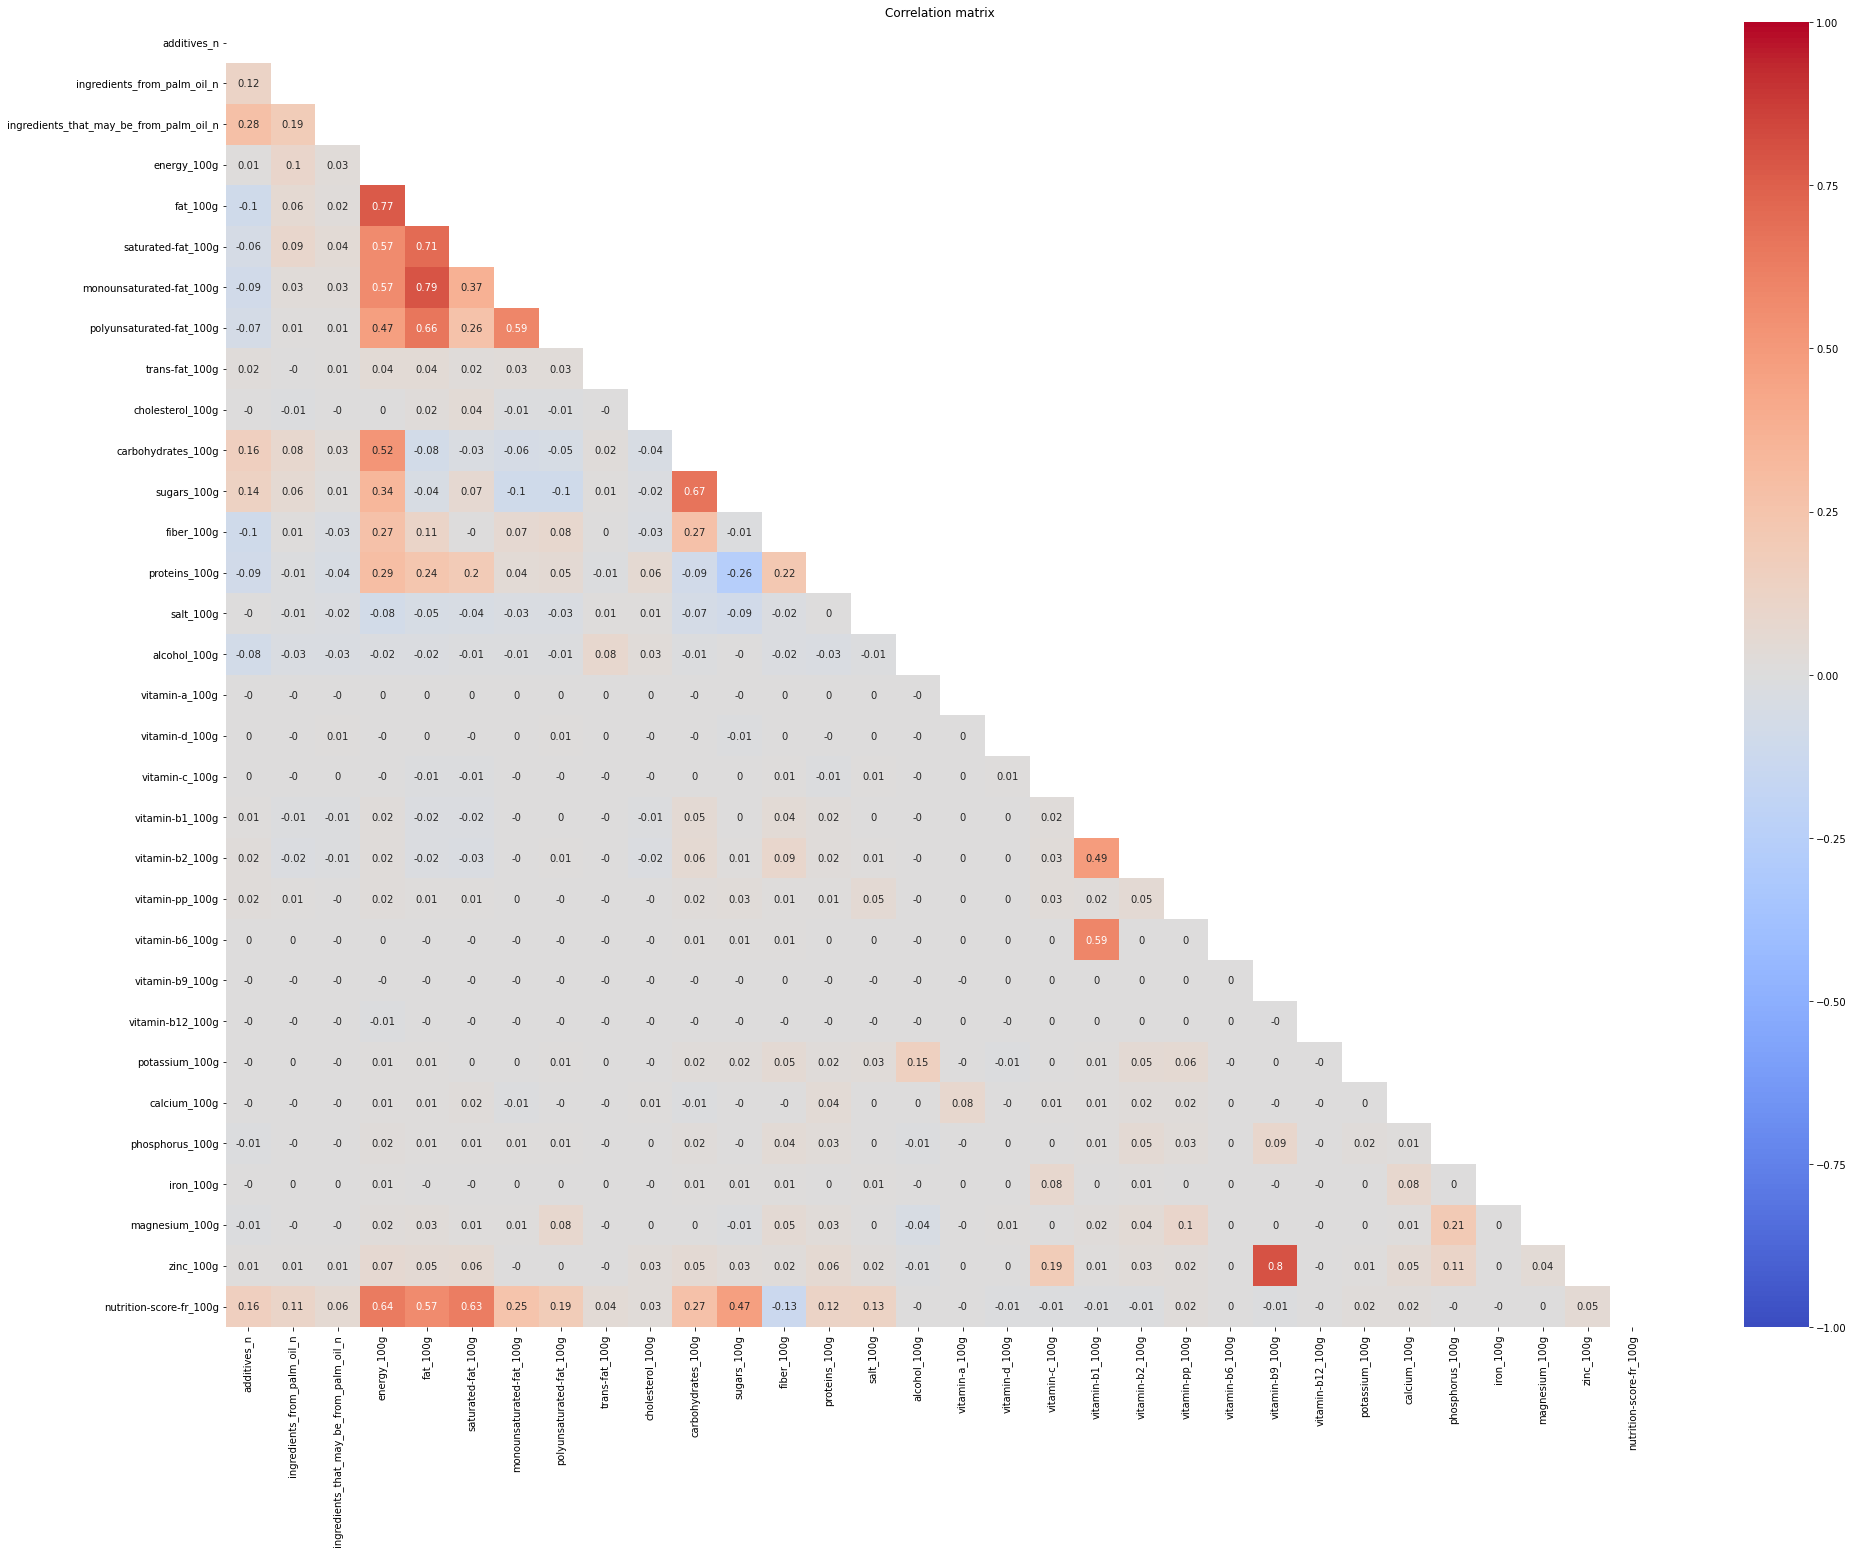

In [16]:
# for bigger plot
scale_factor = 44
default_size = [6.4, 4.8]
plt.rcParams['figure.figsize'] = [n * scale_factor for n in default_size]

# correlation matrix
corr = pf.correlation_matrix(quantitative_columns, df)

plt.rcParams['figure.figsize'] = default_size

### Imputation with KNN

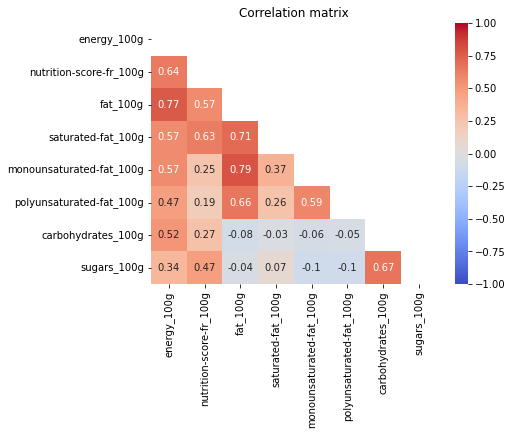

energy_100g                  46208
nutrition-score-fr_100g      81202
fat_100g                     60601
saturated-fat_100g           48425
monounsaturated-fat_100g    159273
polyunsaturated-fat_100g    159264
carbohydrates_100g           60497
sugars_100g                  58726
dtype: int64

energy_100g                 0
nutrition-score-fr_100g     0
fat_100g                    0
saturated-fat_100g          0
monounsaturated-fat_100g    0
polyunsaturated-fat_100g    0
carbohydrates_100g          0
sugars_100g                 0
dtype: int64


In [17]:
columns_to_knn = ['energy_100g', 
                  'nutrition-score-fr_100g', 
                  'fat_100g', 
                  'saturated-fat_100g', 
                  'monounsaturated-fat_100g', 
                  'polyunsaturated-fat_100g', 
                  'carbohydrates_100g', 
                  'sugars_100g'
                 ]

pf.correlation_matrix(columns_to_knn, df)

nb_neighbors = 2

before_imputation = df[columns_to_knn]
imputer = KNNImputer(n_neighbors=nb_neighbors)
imputed = imputer.fit_transform(before_imputation)

#convert back to dataframe (from numpy array)
imputed = pd.DataFrame(imputed, columns=columns_to_knn)

print(before_imputation.isna().sum())
print()
print(imputed.isna().sum())

### Drop columns under a specific percentage of original completion<br>
##### (only dropped now because they could have been usefull for the imputation of other columns)

In [18]:
threshold = 10

drop_list = []
for column in completion_dict:
    nb_values = completion_dict[column][0]
    percent = completion_dict[column][1]
    if percent < threshold:
        drop_list.append(column)
        print(column)

# dropping all columns at once is way faster than calling df.drop() each time
df = df.drop(drop_list, axis=1)
print(df.shape)

monounsaturated-fat_100g
polyunsaturated-fat_100g
alcohol_100g
vitamin-d_100g
vitamin-b1_100g
vitamin-b2_100g
vitamin-pp_100g
vitamin-b6_100g
vitamin-b9_100g
vitamin-b12_100g
potassium_100g
phosphorus_100g
magnesium_100g
zinc_100g
(320639, 31)


### If needed, classic median imputing for the last NaNs

In [21]:
for column in quantitative_columns:
    if column in df.columns:
        df[column] = df[column].fillna(df[column].median())

### Check column completion again

In [22]:
print(df.shape, '\n')

# make dict with nb values and percentage completion of each column

completion_dict = {}
for column in df.columns:
    nb_values = df[column].notna().sum()
    percent = 100 * nb_values / df.shape[0]
    completion_dict[column] = [nb_values, percent]

    
# shows percentage of completion for each column    

print('column_name : nb_values  (percentage_of_completion)', '\n\n')
for column in completion_dict:
    nb_values = completion_dict[column][0]
    percent = completion_dict[column][1]
    print(f'{column} : {nb_values}  ({int(percent)}%)')
    print()

(320639, 31) 

column_name : nb_values  (percentage_of_completion) 


product_name : 302883  (94%)

generic_name : 52768  (16%)

brands : 292267  (91%)

categories : 84375  (26%)

categories_tags : 84374  (26%)

categories_fr : 84375  (26%)

countries_fr : 320359  (99%)

additives_n : 320639  (100%)

additives : 154616  (48%)

ingredients_from_palm_oil_n : 320639  (100%)

ingredients_that_may_be_from_palm_oil_n : 320639  (100%)

nutrition_grade_fr : 239437  (74%)

pnns_groups_1 : 91498  (28%)

pnns_groups_2 : 94475  (29%)

main_category : 84351  (26%)

main_category_fr : 84351  (26%)

energy_100g : 320639  (100%)

fat_100g : 320639  (100%)

saturated-fat_100g : 320639  (100%)

trans-fat_100g : 320639  (100%)

cholesterol_100g : 320639  (100%)

carbohydrates_100g : 320639  (100%)

sugars_100g : 320639  (100%)

fiber_100g : 320639  (100%)

proteins_100g : 320639  (100%)

salt_100g : 320639  (100%)

vitamin-a_100g : 320639  (100%)

vitamin-c_100g : 320639  (100%)

calcium_100g : 320639  (

### Save result as csv file

In [23]:
base = r"D:\OpenClassrooms\projet_3"
name = "imputed_data"

save_path = os.path.join(base, name + '.csv')
print(save_path)

if not test_mode:
    df.to_csv(save_path, index=False)

D:\OpenClassrooms\projet_3\imputed_data.csv


#### Test if the saved dataframe is readable

In [24]:
test = pd.read_csv(save_path, sep=',')
print(test.shape)

(320639, 31)
